In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial.distance import cdist
from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Part A

In [2]:
#Data Understanding & Exploration:

In [3]:
#A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable.
car_name_df= pd.read_csv('Part1+-+Car+name.csv')
car_name_df.head()
car_name_df.shape

(398, 1)

In [4]:
#B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. 
car_attr_df=pd.read_json("Part1+-+Car-Attributes.json")
car_attr_df.head()
car_attr_df.shape

(398, 8)

In [5]:
#C. Merge both the DataFrames together to form a single DataFrame
car_merge_df = pd.merge(car_name_df,car_attr_df,left_index=True, right_index=True)
car_merge_df.head()


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
#D. Print 5 point summary of the numerical features and share insights. 
p_new = car_merge_df.describe()
p_new.tail()

,mpg,cyl,disp,wt,acc,yr,origin
min,9.0,3.0,68.00,1613.00,8.000,70.0,1.0
25%,17.5,4.0,104.25,2223.75,13.825,73.0,1.0
50%,23.0,4.0,148.50,2803.50,15.500,76.0,1.0
75%,29.0,8.0,262.00,3608.00,17.175,79.0,2.0
max,46.6,8.0,455.00,5140.00,24.800,82.0,3.0


In [7]:
#A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.
percent_missing = car_merge_df.isnull().sum()/len(car_merge_df)*100
print(percent_missing)

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64


In [8]:
#B. Check for duplicate values in the data and impute with the best suitable approach. 
car_merge_df.duplicated().sum()

0

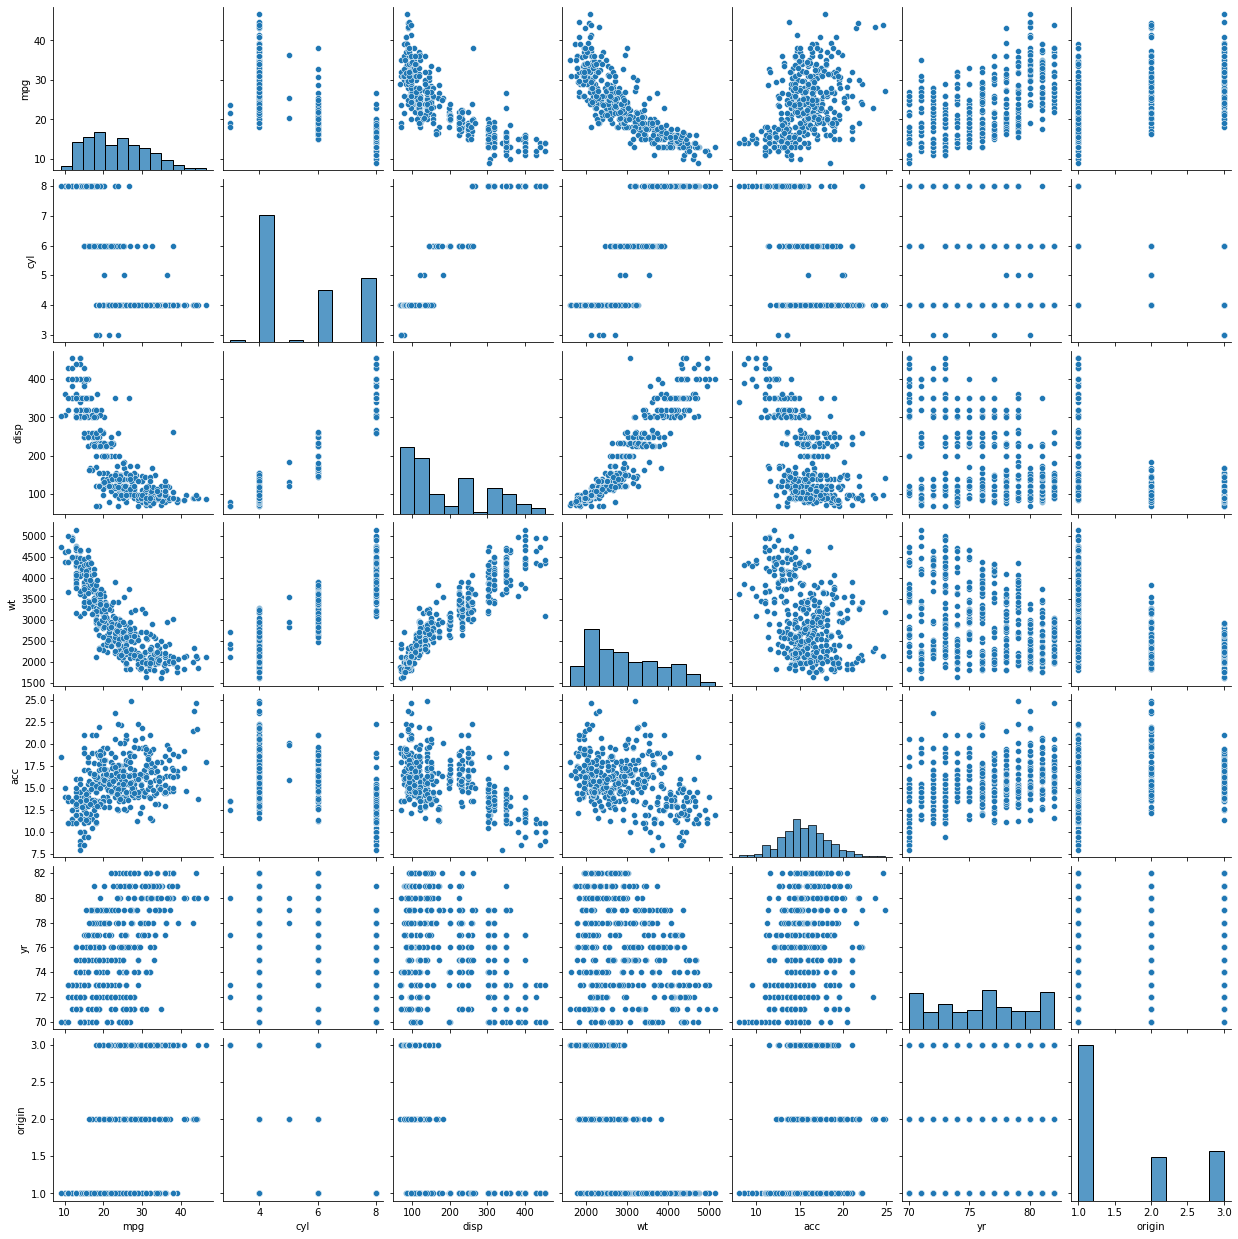

In [9]:
#C. Plot a pairplot for all features. 
sns.pairplot(car_merge_df)
plt.show()

<AxesSubplot:xlabel='wt', ylabel='disp'>

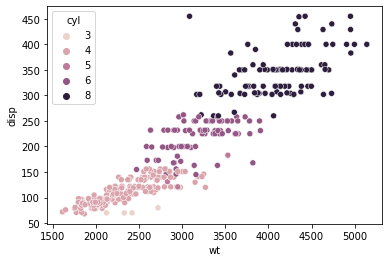

In [10]:
#D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. 
sns.scatterplot(data=car_merge_df, x="wt", y="disp", hue="cyl")

In [11]:
#2e

<AxesSubplot:xlabel='wt', ylabel='mpg'>

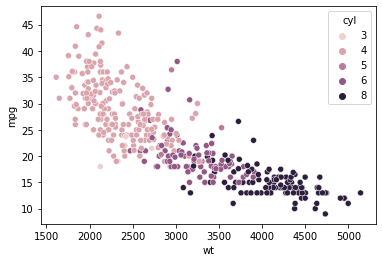

In [12]:
#F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’.
sns.scatterplot(data=car_merge_df, x="wt", y="mpg", hue="cyl")

In [13]:
#2g

In [14]:
#H. Check for unexpected values in all the features and datapoints with such values.  

arr={'!','@','#','$','%','*','?'}
for i in arr:
  if i in car_merge_df.values :
    print("\n Unexpected value existed ",i)
 
  else :
    print("\n Unexpected value not exixted",i)


 Unexpected value not exixted $

 Unexpected value not exixted @

 Unexpected value not exixted *

 Unexpected value existed  ?

 Unexpected value not exixted %

 Unexpected value not exixted #

 Unexpected value not exixted !


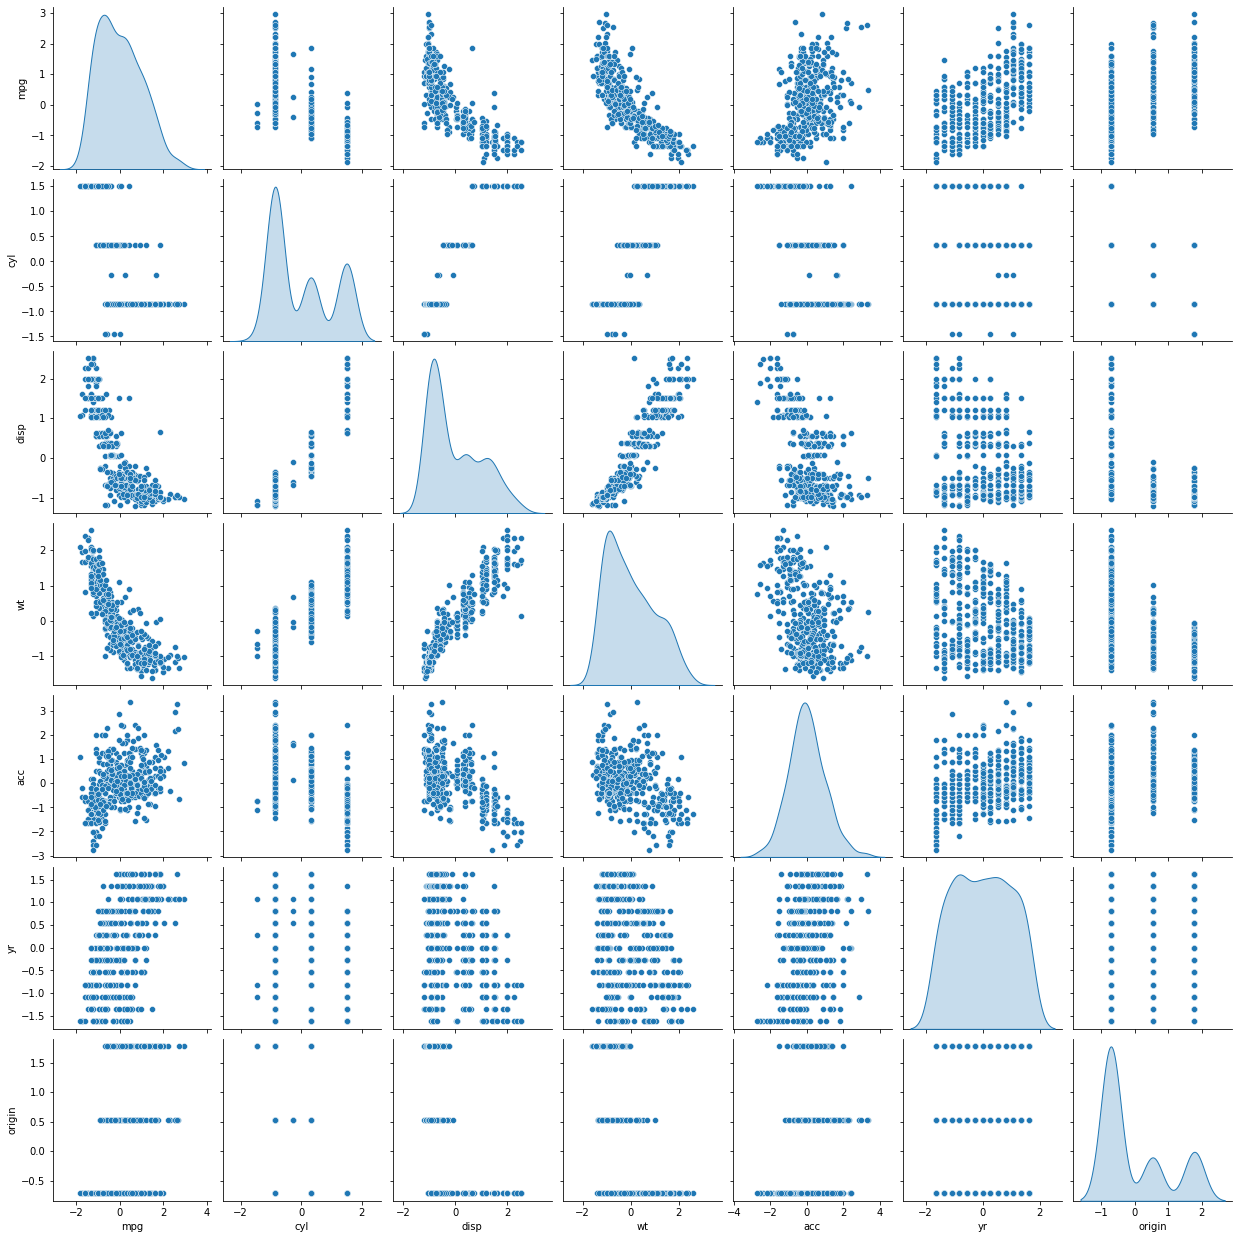

In [15]:
#
column_names = [
    
    1,2,3,5,6,7,8
]

car_merge_attr=car_merge_df.iloc[:,column_names]
car_merge_scaled=car_merge_attr.apply(zscore)
sns.pairplot(car_merge_scaled,diag_kind='kde')

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

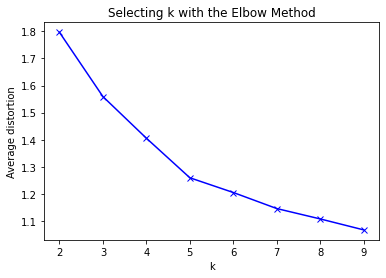

In [16]:
#A. Apply K-Means clustering for 2 to 10 clusters.
#B. Plot a visual and find elbow point.
#C. On the above visual, highlight which are the possible Elbow points.
clusters=range(2,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(car_merge_scaled)
    prediction=model.predict(car_merge_scaled)
    meanDistortions.append(sum(np.min(cdist(car_merge_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / car_merge_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


In [17]:
#D. Train a K-means clustering model once again on the optimal number of clusters. 
#E. Add a new feature in the DataFrame which will have labels based upon cluster value. 

# Let us first start with K = 3
final_model=KMeans()
final_model.fit(car_merge_scaled)
prediction=final_model.predict(car_merge_scaled)

#Append the prediction 
car_merge_df["GROUP"] = prediction
car_merge_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
car_merge_df.head()

Groups Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,7
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,7
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,7
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,7
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1,7


In [18]:
car_merge_cluster = car_merge_scaled.groupby(['GROUP'])
car_merge_cluster.mean()

,mpg,cyl,disp,wt,acc,yr,origin
GROUP,,,,,,,
0,1.260248,-0.789431,-0.847806,-0.901690,-0.080834,1.148111,1.497869
1,-0.563645,0.360177,0.331744,0.367901,0.450185,-0.147140,-0.648565
2,1.508877,-0.795428,-0.923287,-0.874336,1.465153,0.706920,1.308070
3,-0.904507,1.498191,1.243014,1.203731,-0.683850,0.240290,-0.715145
4,0.707343,-0.734535,-0.566502,-0.524301,0.102355,1.089752,-0.715145
5,0.124236,-0.856321,-0.791651,-0.795038,1.052034,-0.925080,-0.247007
6,0.175130,-0.817079,-0.829271,-0.722560,-0.161482,-0.539777,1.094987
7,-1.265056,1.498191,1.617486,1.470431,-1.244905,-1.156883,-0.715145


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

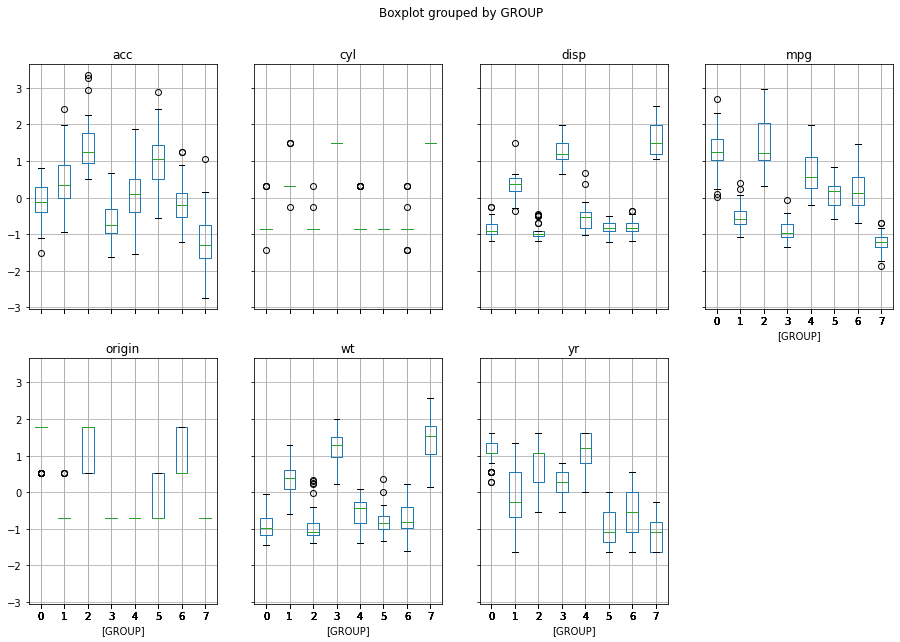

In [19]:
car_merge_scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [20]:
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(car_merge_scaled)
prediction=final_model.predict(car_merge_scaled)

#Append the prediction 
car_merge_df["GROUP"] = prediction
car_merge_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
car_merge_df

Groups Assigned : 



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,2
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,2
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,2
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,2
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1,2
...,...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2,3
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1,1


In [21]:
car_merge_cluster = car_merge_scaled.groupby(['GROUP'])
car_merge_cluster.mean()

,mpg,cyl,disp,wt,acc,yr,origin
GROUP,,,,,,,
0,-0.688413,0.758499,0.650075,0.653774,0.048215,-0.021892,-0.682002
1,0.691365,-0.740525,-0.585754,-0.546144,0.188363,1.036024,-0.715145
2,-1.265056,1.498191,1.617486,1.470431,-1.244905,-1.156883,-0.715145
3,1.343917,-0.784731,-0.867283,-0.869845,0.548354,0.970638,1.410453
4,0.149843,-0.829865,-0.811407,-0.740331,0.206996,-0.696416,0.673488


array([[<AxesSubplot:title={'center':'acc'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'origin'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'yr'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

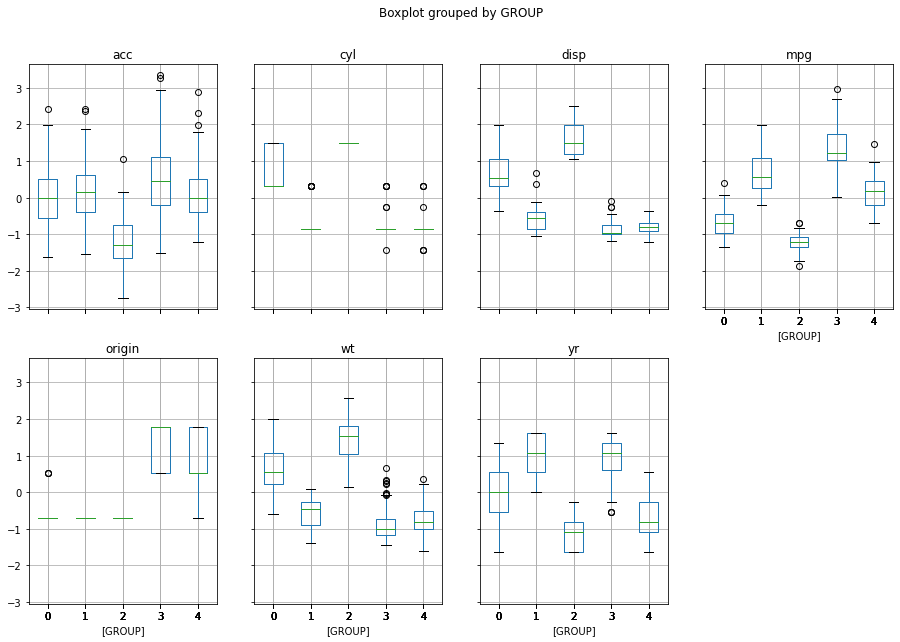

In [22]:
car_merge_scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [23]:
#F. Plot a visual and color the datapoints based upon clusters.
#G. Pass a new DataPoint and predict which cluster it belongs to. 

# Part B

In [24]:
#A. Read ‘vehicle.csv’ and save as DataFrame.
vehicle_df=pd.read_csv("vehicle.csv")
vehicle_df.head()
vehicle_df.shape

(846, 19)

In [25]:
#B. Check percentage of missing values and impute with correct approach.

percent_missing = vehicle_df.isnull().sum()*100/len(vehicle_df)
print(percent_missing)

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64


In [26]:
medianFiller = lambda x: x.fillna(0)
vehicle_filled = vehicle_df.apply(medianFiller,axis=0)
vehicle_filled.head(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


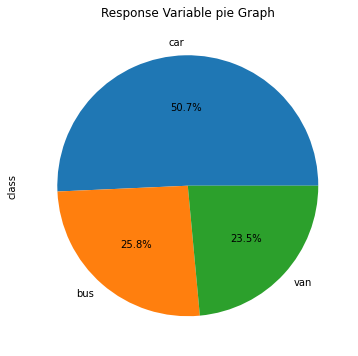

In [27]:
#C. Visualize a Pie-chart and print percentage of values for variable ‘class’. 

plt.figure(figsize=(8,6))
vehicle_filled['class'].value_counts().plot.pie(autopct='%1.1f%%').set_title('Response Variable pie Graph')
plt.show() 

In [28]:
#D. Check for duplicate rows in the data and impute with correct approach
vehicle_filled.duplicated().sum()

0

In [64]:
#independent and dependent variables
X1=vehicle_filled.iloc[:,0:18]
y1 = vehicle_filled.iloc[:,18]

In [65]:
# A. Split data into X and Y. [Train and Test optional] 

X1 = vehicle_filled.drop(['class'], axis=1)
Y1 = vehicle_filled[['class']]
X1.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


In [66]:
#B. Standardize the Data.

X1_scaled=X1.apply(zscore)
X1_scaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.488951,0.076470,0.284286,1.241960,0.311542,-0.198998,0.140516,-0.178035,0.758332,-0.359415,-0.334694,0.288657,-0.234766,-0.064746,0.381885,-0.189712,0.183957
1,-0.325470,-0.507116,0.136316,-0.735976,-0.537879,0.094079,-0.584991,0.518700,-0.527497,-0.344578,-0.539691,-0.610532,-0.484799,-0.011732,0.543864,0.158072,0.033976,0.452977
2,1.254193,0.773541,1.452926,1.139100,0.530024,0.311542,1.137132,-1.120101,0.870349,0.689401,1.052745,1.106421,1.359595,0.099786,1.558214,-0.401462,-0.077868,0.049447
3,-0.082445,-0.507116,0.016624,-0.239632,0.174057,0.094079,-0.733450,0.644762,-0.527497,-0.344578,-0.840150,-0.728748,-1.406996,-1.015388,-0.064746,-0.289555,1.152416,1.529056
4,-1.054545,-0.080230,-0.701527,1.028802,4.920292,9.444962,-0.584991,0.518700,-0.527497,-0.275646,1.593572,-0.638679,0.407650,6.121723,0.543864,-0.177649,-0.972619,-1.699181


In [67]:
#

X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, Y1, test_size=0.30, random_state=10)

In [68]:
X1_test.shape

(254, 18)

In [78]:
#SVM model training for base model
clf = svm.SVC(gamma=0.020, C=4)   
clf.fit(X1_train , y1_train)
y1_pred = clf.predict(X1_test)
model_score = model.score(X1_test, y1_test)
print(model_score)

C:\Users\nav deepak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [72]:
# check the accuracy on the training data
print('Accuracy on Training data: ',model.score(X1_train, y1_train))
# check the accuracy on the testing data
print('Accuracy on Testing data: ', model.score(X1_test , y1_test))
#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y1_test, prediction, average='macro'))
#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

C:\Users\nav deepak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- circularity
- compactness
- distance_circularity
- elongatedness
- hollows_ratio
- ...
Feature names seen at fit time, yet now missing:
- acc
- cyl
- disp
- mpg
- origin
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 18 features, but KMeans is expecting 7 features as input.

In [49]:
from sklearn import metrics
y1_predict = model.predict(X1_train)
cm=metrics.confusion_matrix(y1_train, y1_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

C:\Users\nav deepak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- circularity
- compactness
- distance_circularity
- elongatedness
- hollows_ratio
- ...
Feature names seen at fit time, yet now missing:
- acc
- cyl
- disp
- mpg
- origin
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 18 features, but KMeans is expecting 7 features as input.

In [34]:
#C. Apply PCA on the data with 10 components. 

X1_covMatrix = np.cov(X1_scaled,rowvar=False)
print(X1_covMatrix)
pca = PCA(n_components=10)
pca.fit(X1_scaled)

[[ 1.00118343e+00  5.75120921e-01  7.46475119e-01  6.28413256e-01
   7.14595695e-02  1.48424629e-01  8.07290678e-01 -7.74336126e-01
   7.40559574e-01  6.76943342e-01  7.08461947e-01  8.01114657e-01
   5.79105051e-01 -1.78523323e-01  2.41459793e-01  1.54483610e-01
   2.07593882e-01  3.65984455e-01]
 [ 5.75120921e-01  1.00118343e+00  6.61233165e-01  4.90178424e-01
   1.35207431e-01  2.32256958e-01  6.96370119e-01 -6.71459746e-01
   6.10960944e-01  8.13047484e-01  6.68788446e-01  6.73433065e-01
   7.76662438e-01  1.57710949e-02  1.12694511e-01  1.83317127e-02
   3.35067595e-03  8.84828187e-02]
 [ 7.46475119e-01  6.61233165e-01  1.00118343e+00  6.51940886e-01
   1.36468901e-01  2.54760684e-01  8.49856922e-01 -8.47984781e-01
   7.60761834e-01  7.26181943e-01  7.59880372e-01  8.24824437e-01
   6.72869419e-01 -1.69502385e-01  1.02817196e-01  2.58566372e-01
   1.19749422e-01  3.36909309e-01]
 [ 6.28413256e-01  4.90178424e-01  6.51940886e-01  1.00118343e+00
   5.63143998e-01  4.16420776e-01  6.

PCA(n_components=10)

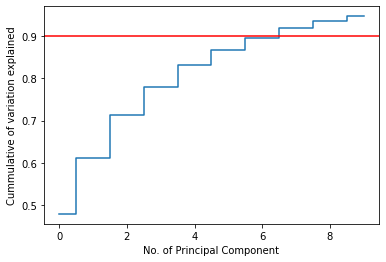

In [35]:
#D. Visualize Cumulative Variance Explained with Number of Components.
#E. Draw a horizontal line on the above plot to highlight the threshold of 90%. 
plotA=plt.step(range(0,len(np.cumsum(pca.explained_variance_ratio_))),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cummulative of variation explained')
plt.xlabel('No. of Principal Component')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.show()

In [36]:
#F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained.

pca6 = PCA(n_components=6)
pca6.fit(X1_scaled)
print(pca6.components_)
print(pca6.explained_variance_ratio_)
xpca6 = pca6.transform(X1_scaled)

[[ 0.28628371  0.26682101  0.30381424  0.25451329  0.07426246  0.1018924
   0.32739305 -0.32103197  0.29981616  0.29230509  0.30638221  0.32154411
   0.2783999  -0.01176852  0.04504032  0.06296484  0.03391235  0.07900917]
 [-0.11985862  0.09954336 -0.08274096 -0.22090422 -0.17599141 -0.03529098
   0.06170317  0.00474479  0.0661484   0.129378    0.07944237  0.0731578
   0.2177128   0.46750477 -0.05438337 -0.1474162  -0.47652242 -0.57752261]
 [-0.13081631  0.00753984 -0.05954884  0.2602833   0.62423774  0.59545431
  -0.09471161  0.06454529 -0.10469914 -0.00199161  0.05652308 -0.10703067
  -0.01359672  0.32919631 -0.11553077 -0.07753651 -0.02469952 -0.00459284]
 [-0.07602629 -0.19765806  0.07266477  0.06548882 -0.02630452 -0.03765817
   0.08715122 -0.09272232  0.10155655 -0.19130642  0.1052476   0.09275973
  -0.20971428  0.06528148 -0.592714    0.65724575 -0.16569413 -0.04132851]
 [ 0.08568252 -0.11322647  0.03035169 -0.05612572 -0.02473756  0.1811066
  -0.0158066   0.07710582  0.03054225

In [37]:
xpca6

array([[ 3.48639418e-01, -3.63109478e-01,  9.73964357e-01,
        -1.54142265e-01,  7.30678118e-02,  8.45400753e-01],
       [-1.44676466e+00, -4.11180520e-01, -3.36309430e-01,
        -2.44780917e-01,  6.88157674e-01,  3.35289198e-01],
       [ 3.66404250e+00,  1.52384898e-01,  1.03856670e-01,
        -1.17604185e+00,  7.57133223e-01, -3.75412986e-01],
       ...,
       [ 4.63107395e+00, -7.43103294e-02,  5.42339256e-01,
        -2.80103715e-01, -1.30487596e+00,  2.70889712e-01],
       [-3.11116976e+00, -8.93509544e-01, -3.60926850e-01,
         1.89352062e+00,  2.46856830e-03,  3.51928464e-01],
       [-4.51066095e+00,  2.88431750e-01, -4.96722193e-01,
         1.18372056e+00, -7.08429184e-02,  1.98949535e-01]])

In [38]:
#G. Train SVM model on components selected from above step. [1 Marks]
#H. Print Classification metrics for train data of above model and share insights. [2 Marks]

In [40]:
#A. Train another SVM on the components out of PCA. Tune the parameters to improve performance. [2 Marks]
#B. Share best Parameters observed from above step. [1 Marks]
#C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along withinsights. [2 Marks]

# 5 Data Understanding & Cleaning: